<center>
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 4 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-1</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques. i) El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves. (ii) El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes. (iii) El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Indiana Jones ha viajado al pasado! Específicamente ha viajado a la antigua Grecia donde se ha encontrado frente a frente con el mismísimo Arquímedes de Siracusa. Este último al ver que el arqueólogo claramente no es de la época decide ayudarlo para regresar, pero ¿Cómo lo puede ayudar?

Arquímedes ha inventado la Anticitera, un dispositivo que permite encontrar grietas temporales para poder viajar en el tiempo. Mediante la ubicación que indica el dispositivo, Indiana podrá dirigirse a ese punto y poder volver. ¿Cuál es el problema? La Anticitera funciona mediante polinomios específicos que permiten calcular las coordenadas. Más aún, el dispositivo **muestra una función** y, en caso de que sea un **polinomio**, se debe estimar su **grado**. Para la época de Arquímedes aún no se desarrollaban algoritmos avanzados para este tipo de desafíos, pero Indiana Jones viene del futuro junto con su joven asistente Short Round, quien tiene conocimientos en Computación Científica!

# Funciones Entregadas (No debe modificarlas)

In [4]:
def gaussian_nodes_and_weights(m, a, b):
    if m==1: 
        return np.array([1]), np.array([2])
    beta = .5 / np.sqrt(1.-(2.*np.arange(1.,m))**(-2))
    T = np.diag(beta,1) + np.diag(beta,-1)
    D, V = np.linalg.eigh(T)
    x = D
    x = .5 * ((b-a)*x + b + a)
    w = 2*V[0,:]**2
    w = .5*(b-a)*w
    return x, w
    
def gaussianquad(myfun, m, a, b):
    f = np.vectorize(myfun)
    x, w = gaussian_nodes_and_weights(m, a, b)
    int_val = np.dot(f(x),w)
    return int_val

Consideremos la siguiente función:

$$
f_1(x) = \sin\left(\dfrac{1}{x}\right), \quad x \in [0,1]
$$

y la integral:

$$
I_1 = \int_{0}^{1}f_1(x)\,\mathrm{d}x
$$

Vamos a calcular la aproximación de $I_1$ mediante *Cuadratura Gaussiana* con $m$ nodos para $ m = \{2,\dots,500\}$. En el siguiente gráfico se observa, mediante los puntos azules, los valores de las aproximaciones y cada punto rojo representa el valor exacto de la integral.

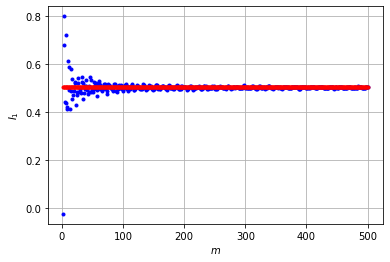

In [5]:
#No modificar la celda, solo ejecutar.
gaussianquad_vec = np.vectorize(gaussianquad)
m_range = range(2,501)
size_m = len(m_range)
exact_int = (0.504067)*np.ones(size_m)

f1 = lambda x: np.sin(1./x)
a,b = 0.,1.
quad = gaussianquad_vec(f1,m_range,a,b)
plt.plot(m_range,quad,'.b')
plt.plot(m_range,exact_int,'.r')
plt.xlabel(r"$m$")
plt.ylabel(r"$I_1$")
plt.grid()
plt.show()

Consideremos ahora la siguiente función:

$$
f_2(x) = x^{15} - 2\,x^{10} + x^{3} - x + 1, \quad x \in [0,1]
$$

y la integral:

$$
I_2 = \int_{0}^{1}f_2(x)\,\mathrm{d}x
$$

Vamos a calcular la aproximación de $I_2$ mediante *Cuadratura Gaussiana* con $m$ nodos para $ m = \{2,\dots,50\}$. Al igual que en el gráfico anterior, se observa mediante los puntos azules, los valores de las aproximaciones y cada punto rojo representa el valor exacto de la integral.

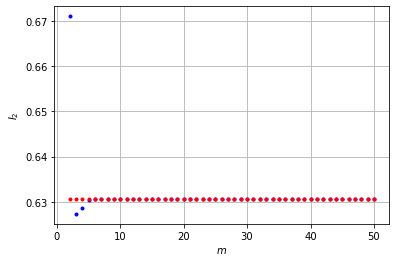

In [6]:
#No modificar la celda, solo ejecutar.
gaussianquad_vec = np.vectorize(gaussianquad)
m_range = range(2,51)
size_m = len(m_range)
exact_int = (111./176.)*np.ones(size_m)

f2 = lambda x: np.power(x,15) - 2.*np.power(x,10) + np.power(x,3) - x + 1.
a,b = 0.,1.
quad = gaussianquad_vec(f2,m_range,a,b)
plt.plot(m_range,quad,'.b')
plt.plot(m_range,exact_int,'.r')
plt.xlabel(r"$m$")
plt.ylabel(r"$I_2$")
plt.grid()
plt.show()

Como usted puede observar, las aproximaciones en ambos casos se comportan de forma diferente. Esto puede llevar a una pista que permita a Indiana Jones y su asistente Short Round a completar la misión!

# Pregunta 1 (40 puntos)

Como a la Anticitera se le debe indicar una estimación del grado de una función $f(x)$ en caso de que sea un polinomio, se le encomienda a usted confeccionar la función `check_poly(f,a,b,tol=1e-14)` que recibe una función $f(x)$, el intervalo $[a,b]$ y considerando una tolerancia `tol` determine si la función $f(x)$ es un polinomio y estime el grado $n$ que puede tener. La función debe retornar la estimación del grado $n$ y en caso de que la función no sea un polinomio, debe retornar $-1$. Considere que las funciones a entregar como input, pueden ser polinomios de grado $n \leq 500$.

*Hint 1: Short Round knows Gaussian Quadrature a lot!*

*Hint 2: in this case relative error is more useful than absolute one.*

In [231]:
def check_poly(f,a,b,tol=1e-14):
    #acá va su codigo
    #--------------------------------
    int_exact = gaussianquad(f, 252, a,b)
    m_range = np.arange(2,252)
    diff_int = lambda x: np.abs(x - int_exact)/np.abs(int_exact)
    quad = gaussianquad_vec(f,m_range,a,b)
    quad_diff = diff_int(quad)
    indices = np.where(quad_diff < tol)[0]
    if len(indices) == 0:
        n = -1  
    else:
        n = 2*(indices[0]+2)-1
    #--------------------------------
    return n

# Pregunta 2

## Pregunta 2.1 (20 puntos) 

Para las siguientes funciones $f_i(x)$ para $i = \{1,\dots,4\}$ en el intervalo $[0,1]$ y utilizando el procedimiento de la pregunta anterior `check_poly`, verifique si la función es un polinomio o no, y en caso de serlo determine la estimación del grado.

- $f_1(x) = \sin\left(\dfrac{1}{x}\right)$
- $f_2(x) = x^{15} - 2\,x^{10} + x^{3} - x + 1$
- $f_3(x) = \dfrac{\exp(x)}{x + 1}$
- $f_4(x) = x^5 - x^4 + 10\,x^2 - 1$

In [232]:
#acá va su codigo
#--------------------------------
f_1 = lambda x: np.sin(1/x)
f_2 = lambda x: np.power(x,15) - 2.*np.power(x,10) + np.power(x,3) - x + 1.
f_3 = lambda x: np.exp(x)/(x+1)
f_4 = lambda x: np.power(x,5) - np.power(x,4) + 10. * np.power(x,2) - 1
(check_poly(f_1, 0., 1.),check_poly(f_2, 0., 1.),check_poly(f_3, 0., 1.),check_poly(f_4, 0., 1.))
#--------------------------------

(-1, 15, 17, 5)

## Pregunta 2.2 (10 puntos)

Escriba sus conclusiones con respecto a los resultados obtenidos en la Pregunta 2.1

**Utilice esta celda para indicar sus conclusiones**

**------------------------------------------------------------------**

Ya que se especifica que el grado maximo de los polinomios es 500, se puede utilizar la formula $2m-1$, con $m$ numero de nodos, para calcular que la cantidad maxima de nodos a ocupar seria 251 para una aproximacion exacta.
Se puede concluir que el metodo de cuadratura gaussiana aproxima de manera exacta funciones polinomiales mostrando un error relativo muy bajo y estimando de manera correcta el grado de las funciones polinomiales. Por otro lado, el error relativo de funcion no polinomial $\sin\left(\dfrac{1}{x}\right)$ permanece por arriba de la tolerancia por lo que la cuadratura gaussiana no aproxima tan bien esta funcion. Sin embargo, para la funcion no polinomial $\dfrac{exp(x)}{(x+1)}$ arroja una estimacion de un polinomio de grado 17, esto se puede deber a que la funcion tiene un comportamiento similar al de una funcion polinomial en el intervalo $[0,1]$, provocando la estimacion resultante

**------------------------------------------------------------------**

# Pregunta 3 

## Pregunta 3.1 (10 puntos)

A continuación se muestra un gráfico del error relativo para las aproximaciones de la integral $I_1$ con $m$ nodos para $m = \{2,\dots,200\}$. Explique lo que usted puede observar del gráfico en términos del error relativo en función de la cantidad de nodos que se utilizan para las aproximaciones. 

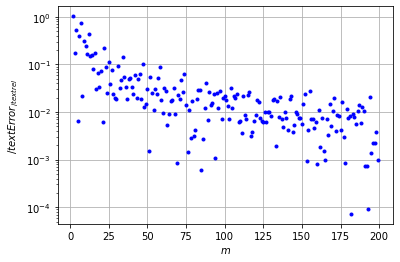

In [108]:
#No modificar la celda, solo ejecutar
a,b = 0.,1.
m_range = range(2,201)
quad = gaussianquad_vec(f1,m_range,a,b)
quad_diff = np.abs(np.diff(quad))/np.abs(quad[1:])
plt.semilogy(m_range[:-1],quad_diff,'.b')
plt.xlabel(r"$m$")
plt.ylabel(r"$\text{Error}_{\text{rel}}$")
plt.grid()
plt.show()

**Utilice esta celda para indicar su explicación**

**------------------------------------------------------------------**

En el grafico se puede ver que el valor del error relativo tiende a la baja cuando se aumenta el numero de nodos utilizados en la cuadratura gaussiana. Sin embargo, cabe recalcar que los valores se presentan muy dispersos lo que demuestra que cuadratura gaussiana no es tan efectiva estimando funciones no polinomiales ya que no mejora su precison de manera uniforme.

**------------------------------------------------------------------**

## Pregunta 3.2 (10 puntos)

A continuación se muestra un gráfico del error relativo para las aproximaciones de la integral $I_2$ con $m$ nodos para $m = \{2,\dots,200\}$. Explique lo que usted puede observar del gráfico en términos del error relativo en función de la cantidad de nodos que se utilizan para las aproximaciones. 

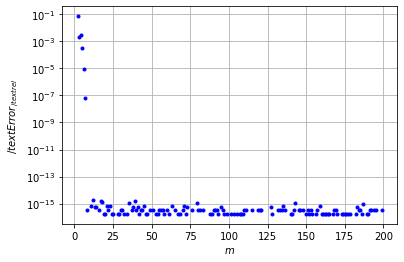

In [109]:
#No modificar la celda, solo ejecutar
a,b = 0.,1.
m_range = range(2,201)
quad = gaussianquad_vec(f2,m_range,a,b)
quad_diff = np.abs(np.diff(quad))/np.abs(quad[1:])
plt.semilogy(m_range[:-1],quad_diff,'.b')
plt.xlabel(r"$m$")
plt.ylabel(r"$\text{Error}_{\text{rel}}$")
plt.grid()
plt.show()

**Utilice esta celda para indicar su explicación**

**------------------------------------------------------------------**

En el grafico se puede apreciar que el valor del error relativo es muy bajo para la mayoria de nodos utilizados lo que indica que cuadratura gaussiana es altamente efectiva al aproximar la integral de funciones polinomiales. Por otro lado, se puede especificar que la cantidad de nodos desde la que el error disminuye considerablemente es 8 nodos, esto se debe a que cuadratura gaussiana integra exactamente polinomios de grado a lo mas $2m-1$ donde $m$ es el numero de nodos. Esta conclucion corresponde a lo visto en el grafico

**------------------------------------------------------------------**

**¡Ya ha llegado al final de la tarea 4! Ahora debe enviarla antes de las 14:00 hrs. del sábado 29 de junio!**